hello world


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()



Since ocean proximity is categorial we use value count to get diffrenet values of diffrent category


In [4]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

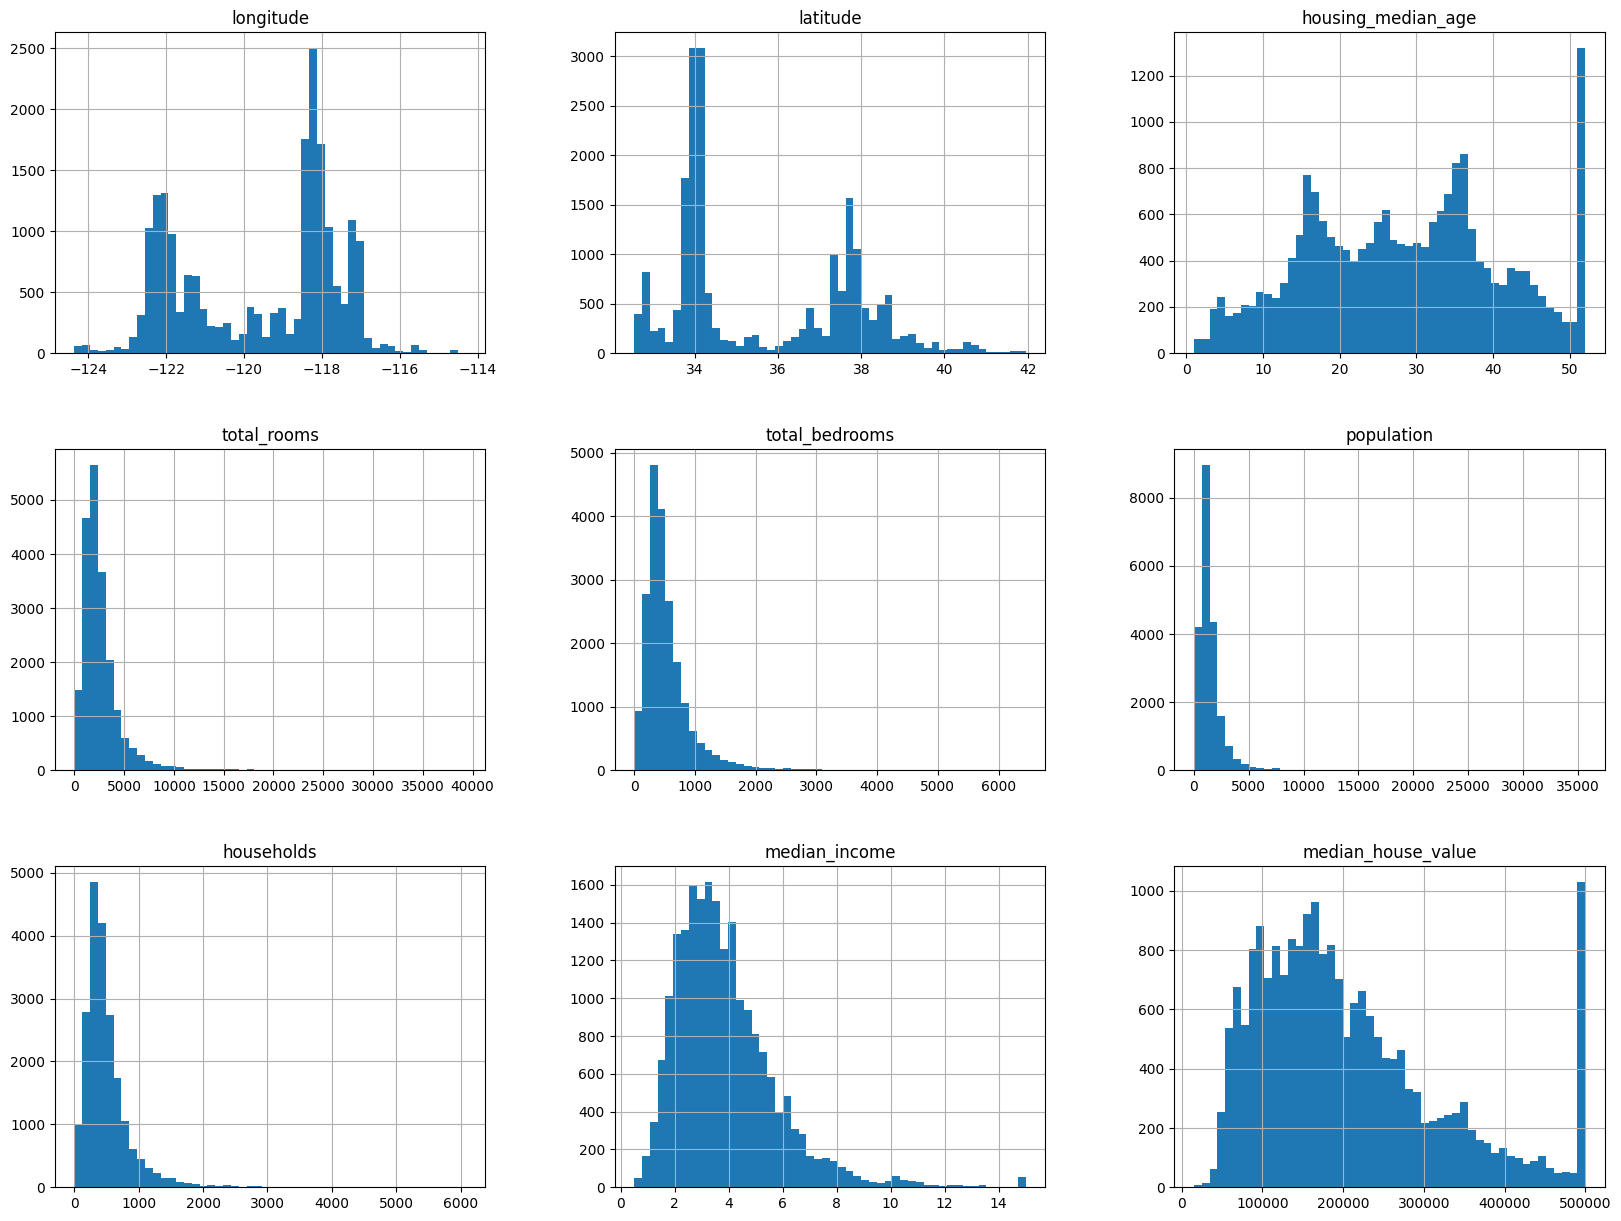

In [5]:
housing.describe()
housing.hist(bins=50,figsize=(20,15))

In [6]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2,
random_state=42)


making a new category income cat for stratifying the data

<Axes: >

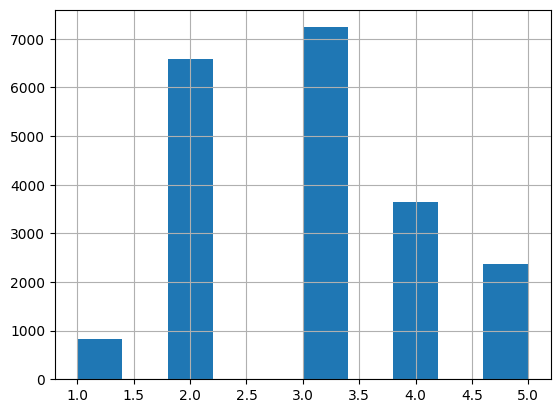

In [8]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

making the stratified test and train data sets for more consistent distribution

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_split=[]
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_split.append([strat_train_set_n,strat_test_set_n])



simplified version using train_test split starified

In [10]:
strat_train_set,strat_test_set=train_test_split(housing,test_size=0.2,stratify=housing['income_cat'],random_state=42)

In [11]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

removing the extra income cat column from both test and train dataset

In [12]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [13]:
housing=strat_train_set.copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN


visualising geographical data


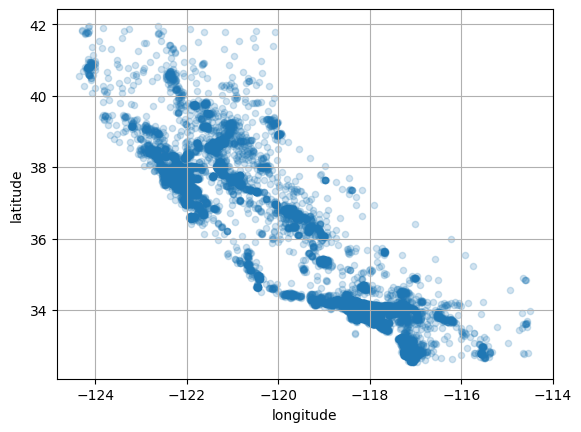

In [14]:
housing.plot(kind='scatter',x='longitude',y='latitude',grid=True ,alpha=0.2)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

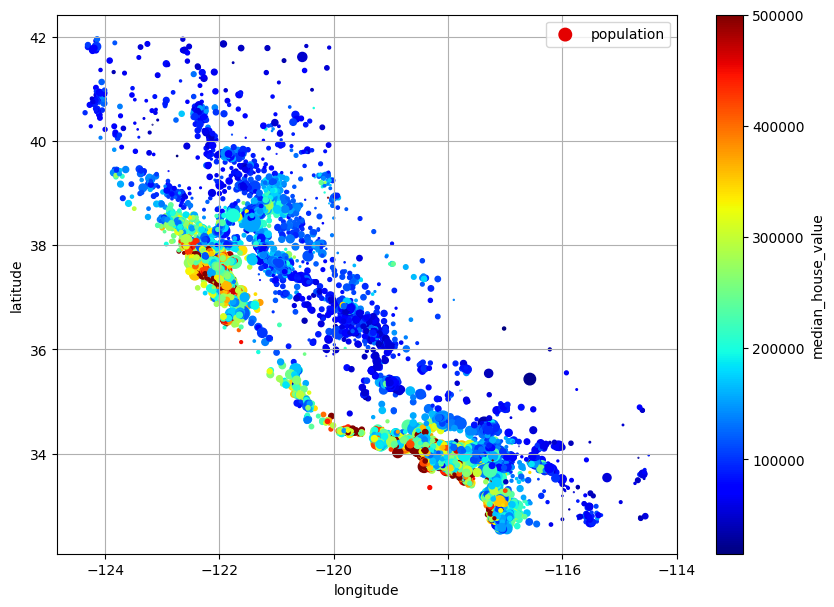

In [15]:
housing.plot(kind='scatter',x='longitude',y='latitude',grid=True,s=housing['population']/100,label='population',c='median_house_value',cmap='jet',colorbar=True,legend=True,sharex=False,figsize=(10,7))

In [16]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

making some new attributes that may be more correlated to the median house value


In [17]:
housing['room_perhouse']=housing['total_rooms']/housing['households']
housing['bedroom_ratio']=housing['total_bedrooms']/housing['total_rooms']
housing['people_per_house']=housing['population']/housing['households']


In [18]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688380
room_perhouse         0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedroom_ratio        -0.256397
Name: median_house_value, dtype: float64

Preparing the data for machine learning algorithm

making the copy of clean data for further processing

drop doesnt affect the data just makes a copy without the column


label is the dependent variable and predictors are the independent variables

In [19]:
housing=strat_train_set.drop('median_house_value',axis=1)
housing_labels=strat_train_set['median_house_value'].copy()
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income ocean_

Cleaning the data

Filling up the missing data 




In [20]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
housing_num=housing.select_dtypes(include=[np.number])
x=imputer.fit(housing_num)
imputer.statistics_
print(imputer.statistics_)
x=imputer.transform(housing_num)

housing_tr=pd.DataFrame(x,columns=housing_num.columns,index=housing_num.index)

housing_tr.info()

[-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]
<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


Handling text and categorial attributes


In [21]:
housing_cat=housing[['ocean_proximity']]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


we use 2 types of encoder 
1st ordinal which is used for encoding values like bad good avg.... which are related to next values
2nd is one hot encoder which can solve our problem since we have some column related while some not
one hot encoder will just create dummies and set one in any one of the categorial column as per the values


the output of this will be in sparxe matrix which is more efficient and faster then regular np for 0s and 1s as we have more 0s then 1

In [22]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [23]:
df_test_unknown=pd.DataFrame({'ocean_proximity':['2H OCEAN',"ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [24]:
cat_encoder.handle_unknown='ignore'
a=cat_encoder.transform(df_test_unknown )
a.toarray()


array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [25]:
cat_encoder.feature_names_in_
x=cat_encoder.get_feature_names_out()
df_test_unknown.index

RangeIndex(start=0, stop=2, step=1)

In [26]:



df_output=pd.DataFrame(data=a.toarray(),columns=x,index=df_test_unknown.index)
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0





Feature scaling
since all the features are at diffrent level its important to tone down all the features to same level so that machine learning algo can run properly
some of the ways of doing so 
1st min max scaling where each  value of an attribute subtracts min value and then divide by difrence of min max
2nd standardization where each value subtracts the mean value then divide by standard deviation



when a feature is tail heavy both these method fail at that time we may use log of the feature 

or we might even use bucketizing in which we divide into buckets or categories like income_cat we used previously this is also useful in multimodal features

another approach for multimodal features would be using radial basis functions

In [27]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled=min_max_scaler.fit_transform(housing_num)

In [28]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
hosuing_num_std_scaled=std_scaler.fit_transform(housing_num)

In [29]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35=rbf_kernel(housing[['housing_median_age']],[[35]],gamma=0.1)


In [30]:
from sklearn.linear_model import LinearRegression
some_new_data=housing[['median_income']].iloc[:5]

In [31]:
from sklearn.compose import TransformedTargetRegressor
model=TransformedTargetRegressor(LinearRegression(),transformer=StandardScaler())
model.fit(housing[['median_income']],housing_labels)
predictions=model.predict(some_new_data)
print(predictions)


[131997.15275877 299359.35844434 146023.37185694 138840.33653057
 192016.61557639]



Custom transformer

some times u wont be able to find a suitable transformer then u might need a feel to create ur own custom transformer sklearn helps you achieve that

In [32]:
from sklearn.preprocessing import FunctionTransformer

log_transformer=FunctionTransformer(np.log ,inverse_func=np.exp)
log_pop=log_transformer.transform(housing[['population']])

custom rbf kernel transformer


In [33]:
rbf_transformer=FunctionTransformer(rbf_kernel,kw_args=dict(Y=[[35.]],gamma=0.1))
age_simil_35=rbf_transformer.transform(housing[['housing_median_age']])
print(age_simil_35)

[[2.81118530e-13]
 [8.20849986e-02]
 [6.70320046e-01]
 ...
 [9.55316054e-22]
 [6.70320046e-01]
 [3.03539138e-04]]


making custom transformer class

In [34]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.utils.validation import check_array,check_is_fitted
class StandardScalerClone(BaseEstimator,TransformerMixin):
    def __init__(self,with_mean=True):
        self.with_mean=with_mean
    def fit(self,X,y=None):
        X=check_array(X)
        self.mean_=X.mean(axis=0)
        self.scale_=X.std(axis=0)
        self.n_features_in_=X.shape[1]
        return self
    def transform(self,X):
        check_is_fitted(self)
        X=check_array(X)
        assert self.n_features_in_==X.shape[1]
        X=X-self.mean_
        return x/self.scale_


In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
class ClusterSimilarity(BaseEstimator,TransformerMixin):
    def __init__(self,n_clusters=10,gamma=1.0,random_state=None):
        self.n_clusters=n_clusters
        self.gamma=gamma
        self.random_state=random_state
    def fit(self,X,y=None,sample_weight=None):
        self.kmeans_=KMeans(self.n_clusters,random_state=self.random_state)
        self.kmeans_.fit(X,sample_weight=sample_weight)
        
        return self
    def transform(self,X):
        
        return rbf_kernel(X,self.kmeans_.cluster_centers_,gamma=self.gamma)
    

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]



cluster_sim=ClusterSimilarity(n_clusters=10,gamma=1.0,random_state=42)
similarities=cluster_sim.fit_transform(housing[['latitude','longitude']],sample_weight=housing_labels)
print(similarities[:3].round(2))
print(cluster_sim.get_feature_names_out())



c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[0.08 0.   0.6  0.   0.   0.99 0.   0.   0.   0.14]
 [0.   0.99 0.   0.04 0.   0.   0.11 0.   0.63 0.  ]
 [0.44 0.   0.3  0.   0.   0.7  0.   0.01 0.   0.29]]
['Cluster 0 similarity', 'Cluster 1 similarity', 'Cluster 2 similarity', 'Cluster 3 similarity', 'Cluster 4 similarity', 'Cluster 5 similarity', 'Cluster 6 similarity', 'Cluster 7 similarity', 'Cluster 8 similarity', 'Cluster 9 similarity']


In [36]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer,make_column_selector
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

creating a custom pipeline for all things done till now


In [37]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
        ],
        remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [38]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(16512, 24)

In [39]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

Now need to train the data will use the training set for this then check the accuracy


In [40]:
from sklearn.linear_model import LinearRegression


lin_reg=make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(housing,housing_labels)



c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022F4FFA6B10>)])),
                ('linearregression', LinearRegression())])

In [41]:
housing_predictions=lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([242800., 375900., 127500.,  99400., 324600.])

In [42]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [43]:
from sklearn.metrics import mean_squared_error
lin_rmse=mean_squared_error(housing_labels,housing_predictions,squared=False)
lin_rmse

68647.95686706669

In [44]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022F4FFA6B10>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [45]:
housing_predictions = tree_reg.predict(housing)
print(housing_predictions)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

[458300. 483800. 101700. ... 148800. 500001. 233300.]


0.0

In [46]:
from sklearn.model_selection import cross_val_score
tree_rmses=-cross_val_score(tree_reg,housing,housing_labels,scoring='neg_root_mean_squared_error',cv=10)

c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [47]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     67153.318273
std       1963.580924
min      63925.253106
25%      66083.277180
50%      66795.829871
75%      68074.018403
max      70664.635833
dtype: float64

In [48]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
forest_rmses=-cross_val_score(forest_reg,housing,housing_labels,scoring='neg_root_mean_squared_error',cv=10)

c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [49]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47002.931706
std       1048.451340
min      45667.064036
25%      46494.358345
50%      47093.173938
75%      47274.873814
max      49354.705514
dtype: float64

In [52]:

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
full_pipeline=Pipeline([('preprocessing',preprocessing),('random_forest',RandomForestRegressor(random_state=42))])
param_grid=[{'preprocessing__geo__n_clusters':[5,8,10],'random_forest__max_features':[4,6,8]},
            {'preprocessing__geo__n_clusters':[10,15],'random_forest__max_features':[6,8,10]}]


grid_search=GridSearchCV(full_pipeline,param_grid,cv=3,scoring='neg_root_mean_squared_error')
grid_search.fit(housing,housing_labels)

c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000022F4FFA6B10>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [53]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={'preprocessing__geo__n_clusters': randint(low=3,high=50),
                    'random_forest__max_features':randint(low=2,high=20)}

rnd_search=RandomizedSearchCV(full_pipeline,param_distributions=param_distribs,n_iter=10,cv=3,scoring='neg_root_mean_squared_error',random_state=42)


rnd_search.fit(housing,housing_labels)

c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022F6F151F90>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022F6F1F38D0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [61]:
final_model=rnd_search.best_estimator_
feature_importances=final_model['random_forest'].feature_importances_
feature_importances.round(2)

array([0.06, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.01, 0.02,
       0.04, 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ,
       0.01, 0.  , 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.03, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [63]:
sorted(zip(feature_importances,final_model['preprocessing'].get_feature_names_out()),reverse=True)

[(0.1898423270105783, 'log__median_income'),
 (0.07709175866873944, 'cat__ocean_proximity_INLAND'),
 (0.06455488601956336, 'bedrooms__ratio'),
 (0.056936146643377976, 'rooms_per_house__ratio'),
 (0.0490294770805355, 'people_per_house__ratio'),
 (0.03807069074492323, 'geo__Cluster 3 similarity'),
 (0.025643913400094472, 'geo__Cluster 22 similarity'),
 (0.02179127543243723, 'geo__Cluster 17 similarity'),
 (0.021575251507503695, 'geo__Cluster 6 similarity'),
 (0.017868654556924362, 'geo__Cluster 2 similarity'),
 (0.017431400050755975, 'geo__Cluster 32 similarity'),
 (0.015981159400591683, 'geo__Cluster 18 similarity'),
 (0.014888464257396877, 'geo__Cluster 40 similarity'),
 (0.014488389218107146, 'geo__Cluster 43 similarity'),
 (0.014252940099964142, 'geo__Cluster 7 similarity'),
 (0.014038173319370725, 'geo__Cluster 21 similarity'),
 (0.013846025114732161, 'geo__Cluster 38 similarity'),
 (0.013625709964722737, 'geo__Cluster 34 similarity'),
 (0.013547297167034428, 'geo__Cluster 41 simila

## testing on test set

In [65]:
x_test=strat_test_set.drop('median_house_value',axis=1)
y_test=strat_test_set['median_house_value'].copy()

final_prediction=final_model.predict(x_test)
final_rmse=mean_squared_error(y_test,final_prediction,squared=False)
print(final_rmse)

41549.20158097943


In [66]:
from scipy import stats
confidence=0.95
squared_errors=(final_prediction-y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([39395.35475927, 43596.76969025])